In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout ,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

2023-05-25 00:20:45.629205: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 00:20:45.672509: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 00:20:45.673664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 00:20:46.578940: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#Load CIFAR-10 dataset
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 837s 5us/step


In [3]:
len(X_train)

50000

In [31]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

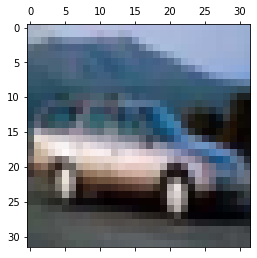

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
#axes = plt.subplots(2,figsize=(12,12))
plt.matshow(X_train[4])
#plt.matshow(X_train[6],ax=axes[1,0])

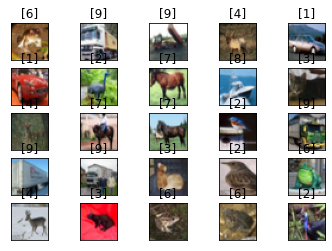

In [43]:
# Plot the first 25 images from the training set
for i in range(25):
    plt.subplot(5, 5, i + 1,)
    #fig = figsize=(45,35)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

plt.show()

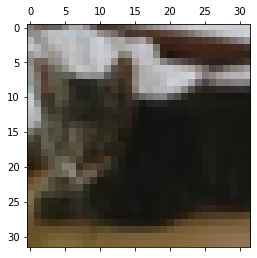

In [23]:
plt.matshow(X_train[9])

In [24]:
#Define the model

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [26]:
#Define data generators

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [27]:
#prepare the data

train_set = train_datagen.flow(X_train,y_train,batch_size=32)
test_set = test_datagen.flow(X_test,y_test,batch_size=32)

In [28]:
#Compile the model

sgd = SGD(lr=0.01, decay = 1e-6, momentum=0.9,nesterov = True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

/home/sumeet/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
# Train the model

model.fit_generator(train_set,steps_per_epoch=len(X_train)//32,epochs=5,
                   validation_data=test_set,validation_steps=len(X_test)//32)

Epoch 1/5
   2/1562 [..............................] - ETA: 1:43 - loss: nan - accuracy: 1.0000

/tmp/ipykernel_9375/1231730394.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_set,steps_per_epoch=len(X_train)//32,epochs=5,
2023-05-25 01:03:33.291572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1562/1562 [==============================] - 101s 65ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/5
1562/1562 [==============================] - 101s 65ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/5
1562/1562 [==============================] - 101s 65ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/5
1562/1562 [==============================] - 101s 65ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/5
1562/1562 [==============================] - 103s 66ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000


In [32]:
# Evaluate the model

score= model.evaluate(test_set,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:',score[1])

2023-05-25 01:12:47.651927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: nan
Test accuracy: 1.0
